# Intermediate Cones

In [1]:
import numpy as np
import pypolycontain as pp
np.random.seed(0)
n,q_i,q_c=5,9,11
Z_i=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_i))-0.5)
Z_c=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_c))-0.5)

In [3]:
# Z_i.G=np.array([[ 1., -4., -3.],
#        [ 3.,  5.,  4.],
#        [-1.,  5., -4.]])
# Z_c.G=np.array([[-4., -4., -4.,  3.],
#        [-1., -1.,  5., -1.],
#        [-2.,  3., -2.,  1.]])
circumbody=pp.to_AH_polytope(Z_c)

AttributeError: module 'pypolycontain.containment' has no attribute 'extreme_rays_for_containment'

{0: array([6.71000000e+02, 0.00000000e+00, 4.11525807e-01, 1.06709509e+01]),
 1: array([ 9.35000000e+02, -4.44089210e-16,  4.11525807e-01,  2.03448875e+01]),
 2: array([9.35000000e+02, 1.11022302e-16, 4.11525807e-01, 2.05576382e+01]),
 3: array([6.71000000e+02, 0.00000000e+00, 4.11525807e-01, 1.06850336e+01]),
 4: array([3.41000000e+02, 6.66133815e-16, 4.11525807e-01, 3.34773350e+00]),
 5: array([ 1.21000000e+02, -4.44089210e-16,  4.11525807e-01,  5.82009792e-01]),
 6: array([ 2.20000000e+01, -4.44089210e-16,  4.11525807e-01,  5.68253994e-02])}

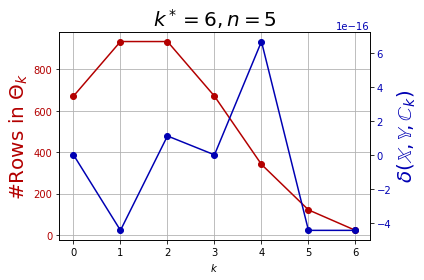

In [2]:
pp.necessity_gap_k(Z_i,Z_c)

In [1]:
import pydrake.solvers.mathematicalprogram as MP
# use Gurobi solver
import pydrake.solvers.gurobi as Gurobi_drake
gurobi_solver=Gurobi_drake.GurobiSolver()
Theta={}
for i in range(-1,K+1):
    program=MP.MathematicalProgram()
    beta=program.NewContinuousVariables(1,"beta")
    parametric_circumbody=circumbody.copy()
    parametric_circumbody.P.h=circumbody.P.h*beta
    Theta[i],*_=pp.subset(program,Z_i,parametric_circumbody,k=i)
    program.AddLinearCost(np.eye(1),np.zeros((1)),alpha)
    result=gurobi_solver.Solve(program,None,None)
    if result.is_success():
        alpha=1/result.GetSolution(beta)[0]
        print("%d: subset test successfull"%i)
        print(r"alpha=",alpha)
    else:
        print("not a subset") 
pp.visualize([circumbody,])

NameError: name 'K' is not defined